In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns


In [157]:
df=pd.read_csv("Titanic-Dataset.csv")

In [158]:
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Partie 1 : analyse des valeurs manquantes

In [6]:
counts_null = df.isnull().sum().to_dict() # Dictionnaire contenant le nombre de valeurs manquantes par colonne


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [7]:
df_plot = df.isnull().sum()
total = len(df)
df_plot=df_plot[df_plot > 0 ].sort_values(ascending=False).div((total/100)).round(1)
df_plot.index.name="columns_with_na"
df_plot.name = "percentage_missing"

In [8]:
df_plot = df_plot.to_frame()

In [9]:
df_plot

,percentage_missing
columns_with_na,
Cabin,77.1
Age,19.9
Embarked,0.2


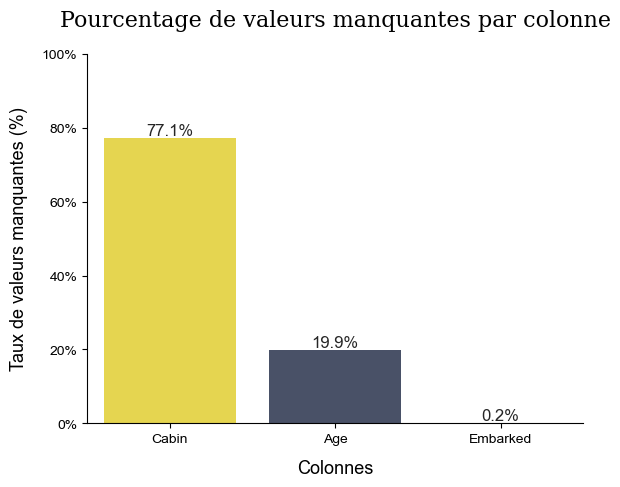

In [10]:
sns.barplot(data=df_plot, y="percentage_missing" , x="columns_with_na", hue="percentage_missing",palette="cividis", legend=False)
sns.despine() # supprimer les bordures
sns.set_theme(style="ticks")

plt.ylim(0,100)

# Ajout d’annotations (pourcentages) au-dessus de chaque barre
for i in range(len(df_plot)):
    plt.text(i, df_plot.iloc[i, 0] , f"{df_plot.iloc[i, 0]}%", ha="center", va="bottom")

# Formatage des valeurs de l’axe Y en pourcentage
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_ : f"{int(y)}%"))


plt.title("Pourcentage de valeurs manquantes par colonne", fontsize=16, fontfamily="serif", pad=20)
plt.ylabel("Taux de valeurs manquantes (%)", fontsize=13, fontfamily="sans serif", labelpad=10)
plt.xlabel("Colonnes", fontsize=13, fontfamily="sans serif", labelpad = 10)

plt.show()

# Partie 2 : Analyse des distributions

In [12]:
df_describe_before = df.describe()

In [13]:
df_describe_before

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1. Histogrammes des distributions de Age et Fare avant traitement

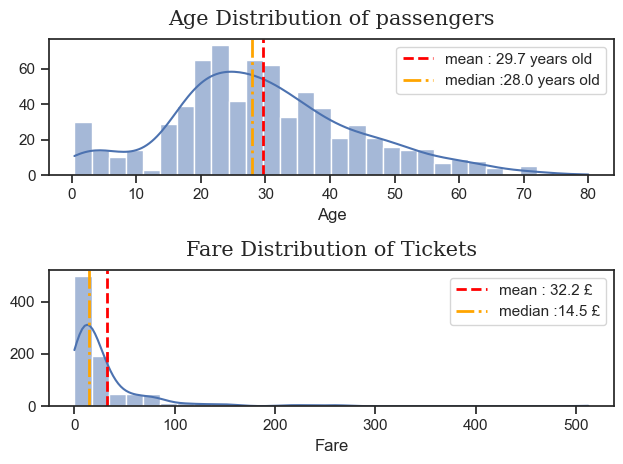

In [30]:
numerical_columns=['Age', 'Fare']

fig, ax = plt.subplots(2,1)

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], ax=ax[i], kde=True,  bins=30)
    
    ax[i].set_ylabel("")
    ax[i].set_title(f"{column} Distribution of {'passengers' if column =='Age' else 'Tickets'}", pad=10, fontsize=15, fontfamily='serif')

    mean = df[column].mean()
    median = df[column].median()

    # Ligne verticale pour la moyenne
    ax[i].axvline(mean, color="red", linestyle="--", linewidth=2, label=f'mean : {round(mean, 1)}{" years old" if column =="Age" else " £"}')
    # Ligne verticale pour la médiane
    ax[i].axvline(median, color="orange", linestyle="-.", linewidth=2, label=f'median :{round(median,1)}{" years old" if column =="Age" else " £"}')

    ax[i].legend()

fig.tight_layout()
plt.show()


#### 2. Analyse comparative des boxplots : Age vs Fare

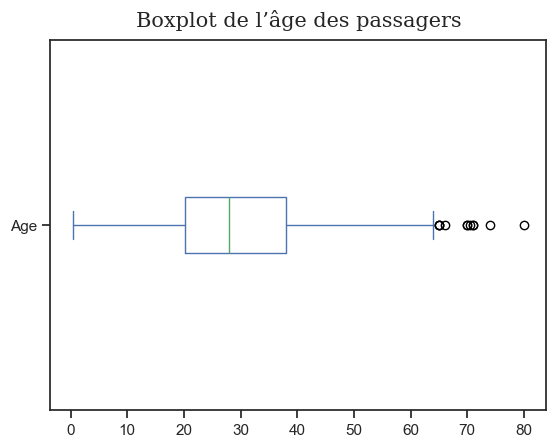

In [53]:
df['Age'].plot(kind="box", vert=False)
plt.title("Boxplot de l’âge des passagers",pad=10, fontsize=15, fontfamily='serif')
plt.show()

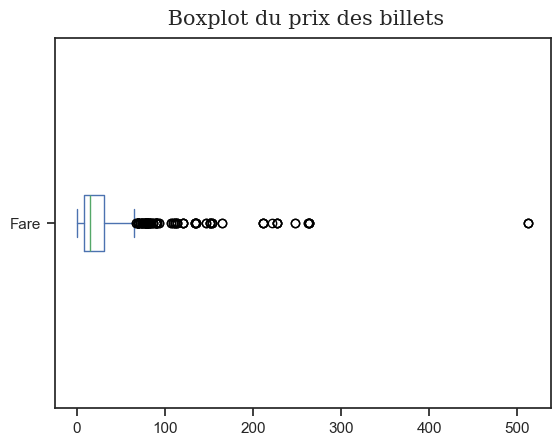

In [54]:
df['Fare'].plot(kind="box", vert=False)
plt.title(" Boxplot du prix des billets",pad=10, fontsize=15, fontfamily='serif')
plt.show()

#### 3.Analyse exploratoire des variables catégorielles (Sex, Embarked, Pclass)

In [ ]:
# Préparation des données catégorielles pour la visualisation
df_Sex = df["Sex"].value_counts()
df_Embarked = df["Embarked"].value_counts()
df_Pclass= df["Pclass"].value_counts()

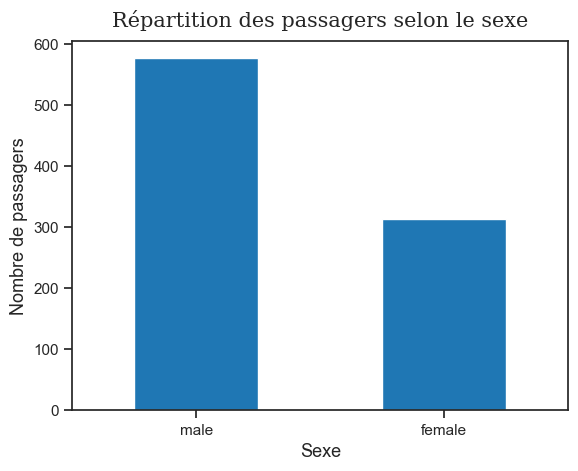

In [82]:
# Visualisation de la répartition des passagers selon le sexe à l’aide d’un diagramme en barres

df_Sex.plot(kind="bar", colormap="tab10")
plt.title("Répartition des passagers selon le sexe", pad=10, fontsize=15, fontfamily='serif' )
plt.xticks(rotation=0, ha="center")
plt.xlabel("Sexe", fontsize=13)
plt.ylabel("Nombre de passagers", fontsize=13)
plt.show()

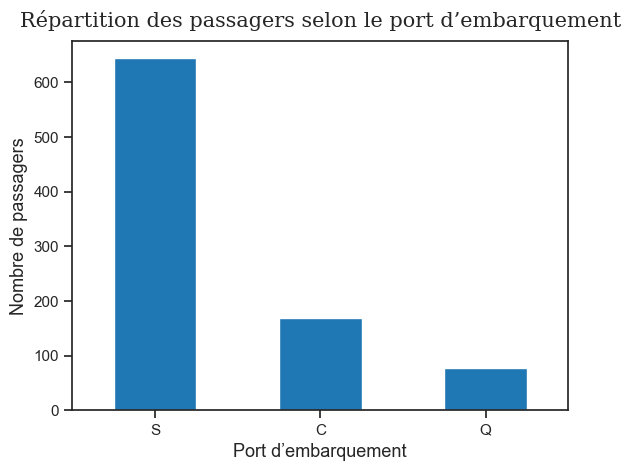

In [88]:
# Visualisation de la répartition des passagers selon le port d’embarquement à l’aide d’un diagramme en barres

df_Embarked.plot(kind="bar", colormap="tab10")
plt.title("Répartition des passagers selon le port d’embarquement", pad=10, fontsize=15, fontfamily='serif' )
plt.xticks(rotation=0, ha="center")
plt.xlabel("Port d’embarquement", fontsize=13)
plt.ylabel("Nombre de passagers", fontsize=13)
plt.show()

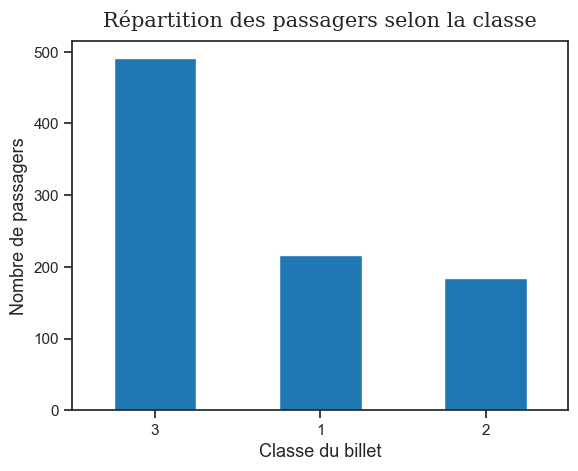

In [89]:
# Visualisation de la répartition des passagers  selon la classe à l’aide d’un diagramme en barres

df_Pclass.plot(kind="bar", colormap="tab10")
plt.title("Répartition des passagers selon la classe", pad=10, fontsize=15, fontfamily='serif' )
plt.xticks(rotation=0, ha="center")
plt.xlabel("Classe du billet", fontsize=13)
plt.ylabel("Nombre de passagers", fontsize=13)
plt.show()

In [95]:
columns_categorical = ["Sex","Embarked", "Pclass"]

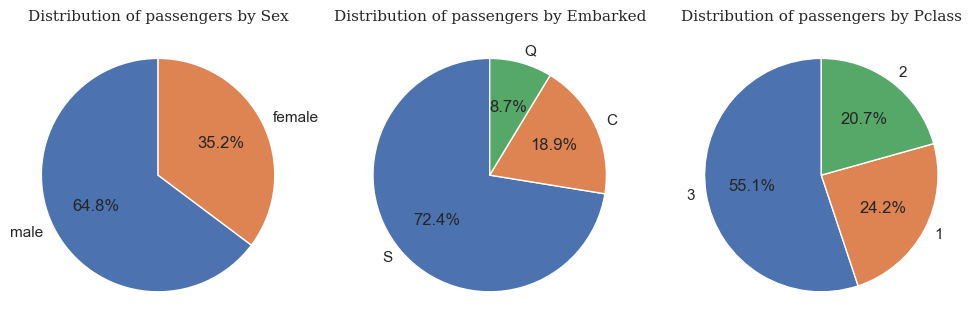

In [104]:
# Création de diagrammes circulaires pour visualiser la distribution des passagers selon les variables catégorielles
fig, ax =plt.subplots(1, 3, figsize=(10, 8))

for i , column in enumerate(columns_categorical):
    df_plot = df[column].value_counts()
    df_plot.plot(kind="pie", autopct="%1.1f%%", startangle=90, ax=ax[i])
    ax[i].set_title(f"Distribution of passengers by {column}",fontsize=11, fontfamily="serif" )
    ax[i].set_ylabel('')

fig.tight_layout()
plt.show()


# Partie 3 : Nettoyage et imputation des valeurs manquantes

In [105]:
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()

In [107]:
imputer = SimpleImputer(strategy="mean")

In [ ]:
df_mean["Age"] = imputer.fit_transform(df_mean[["Age"]])
df_mean["Fare"] = imputer.fit_transform(df_mean[["Fare"]]) # Cette étape est inutile car la colonne Fare ne contient aucune valeur manquante 

In [120]:
df_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
df_describe_before

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
imputer = SimpleImputer(strategy="median")
df_median["Age"] = imputer.fit_transform(df_median[["Age"]])

In [131]:
df_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
imputer =  SimpleImputer(strategy="most_frequent")
# Embarked est une variable catégorielle
# On peut utiliser ravel() avec des variables catégorielles pour effectuer l’imputation
# Cette approche est plus simple et plus rapide que de réaliser un encodage numérique avant l’imputation
df_mode["Embarked"] = imputer.fit_transform(df_mode[["Embarked"]]).ravel()

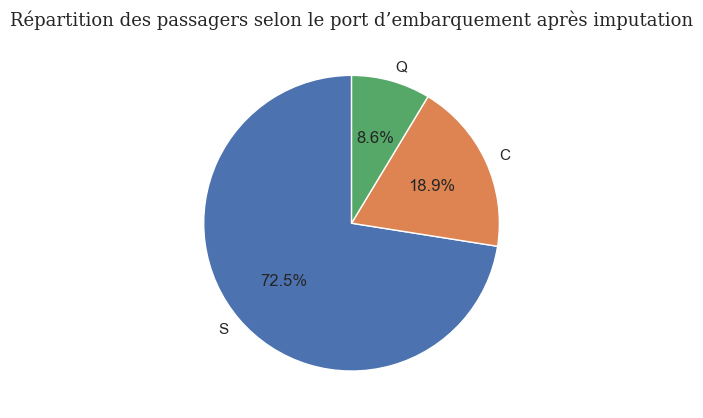

In [129]:
df_mode["Embarked"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.title("Répartition des passagers selon le port d’embarquement après imputation", pad=10, fontsize=13, fontfamily='serif')
plt.ylabel('')
plt.show()


In [147]:
imputer =  SimpleImputer(strategy="most_frequent")
df_mode["Age"] = imputer.fit_transform(df_mode[["Age"]])

In [148]:
df_mode.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
df_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Partie 4 : Visualisation comparative

#### 4.1 Comparaison des distributions de l’âge selon les méthodes d’imputation

In [153]:
labels = labels = ["sans imputation", "moyenne", "médiane", "mode"]

In [142]:
df_list = []

In [ ]:
df_list.append(df_mean["Age"])
df_list.append(df_median["Age"])
df_list.append(df_mode["Age"])

In [160]:
df_list[0] = df["Age"].dropna()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8780\3850416972.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_list, labels = labels, vert=False)


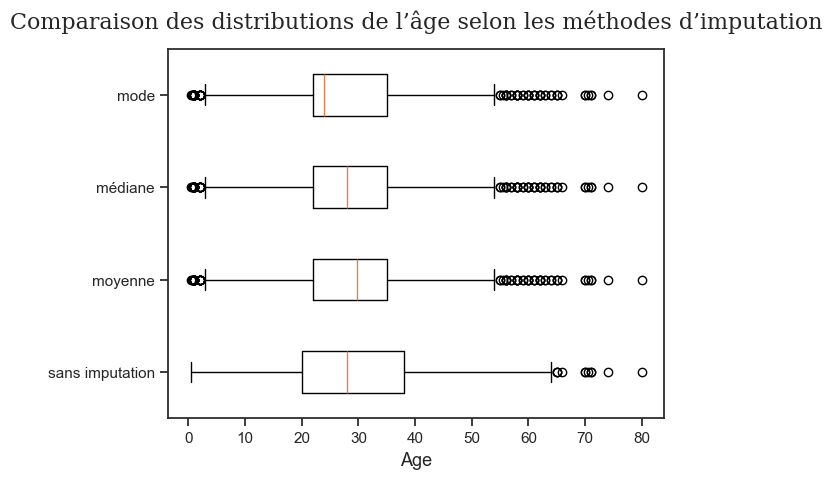

In [162]:
plt.boxplot(df_list, labels = labels, vert=False)
plt.title("Comparaison des distributions de l’âge selon les méthodes d’imputation", fontsize=16, fontfamily="serif", pad = 15)
plt.xlabel("Age", fontsize=13)
plt.show()

#### 4.2 Diagrammes en barres de la variable Embarked avant et après imputation

C:\Users\DELL\AppData\Local\Temp\ipykernel_8780\1269518923.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


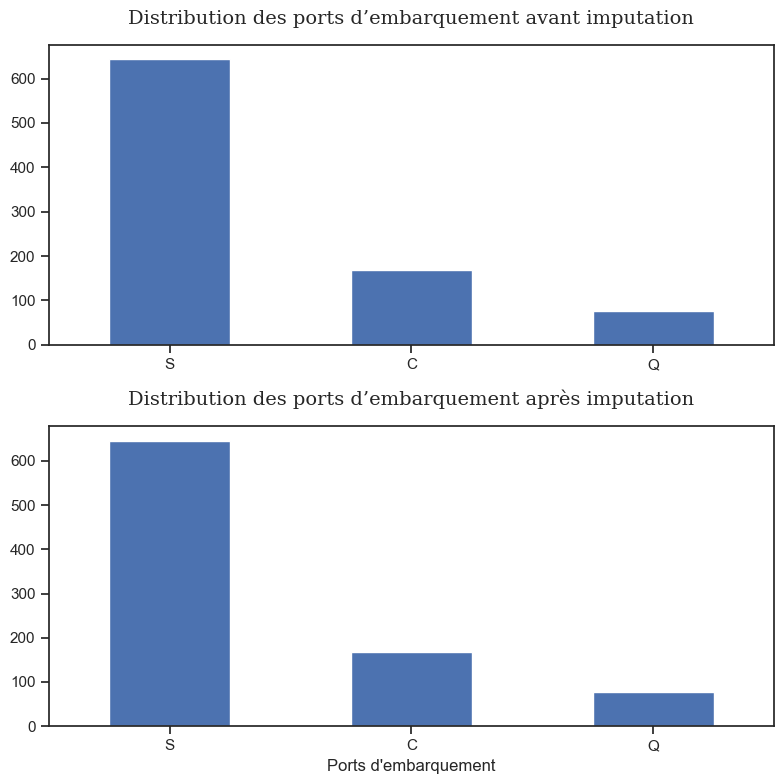

In [178]:
fig, ax =plt.subplots(2,1, figsize=(8, 8))

df["Embarked"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Distribution des ports d’embarquement avant imputation", fontsize=14, fontfamily="serif", pad = 15)
ax[0].tick_params(axis="x", rotation=0)
ax[0].set_xlabel('')
df_mode["Embarked"].value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title("Distribution des ports d’embarquement après imputation", fontsize=14, fontfamily="serif", pad = 15)
ax[1].tick_params(axis="x", rotation=0)
ax[1].set_xlabel("Ports d'embarquement")
fig.tight_layout()
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8780\936163226.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


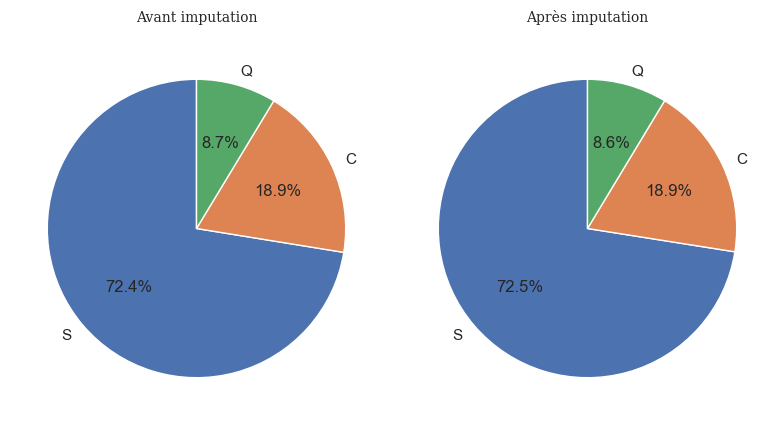

In [182]:
fig, ax =plt.subplots(1,2, figsize=(8, 8))

df["Embarked"].value_counts().plot(kind="pie",ax=ax[0],autopct="%1.1f%%", startangle=90)
ax[0].set_title("Avant imputation", fontsize=10, fontfamily="serif", pad = 15)
ax[0].tick_params(axis="x", rotation=0)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
df_mode["Embarked"].value_counts().plot(kind="pie",ax=ax[1],autopct="%1.1f%%", startangle=90)
ax[1].set_title("Après imputation", fontsize=10, fontfamily="serif", pad = 15)
ax[1].tick_params(axis="x", rotation=0)
ax[1].set_xlabel("")
ax[1].set_ylabel('')
fig.tight_layout()
fig.show()

# Visualisation de la distribution des survivants et du sexe dans le dataset

In [72]:
df["Survived"].unique()

array([0, 1])

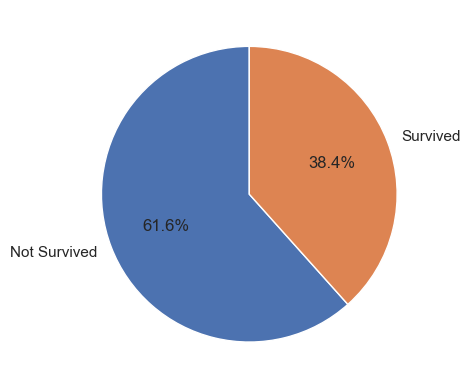

In [73]:
df["Survived"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, labels=["Not Survived","Survived"])
sns.set_theme(style="ticks")
plt.ylabel("")
plt.show()

In [74]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

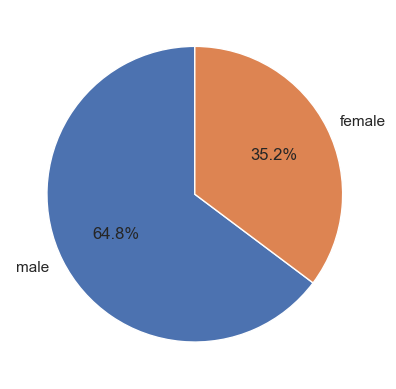

In [ ]:
df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.show()

In [48]:
mean_age = round(df["Age"].mean(),2)

In [49]:
df["Age"] =df["Age"].apply(lambda x: x if pd.notna(x) else mean_age)

<Axes: >

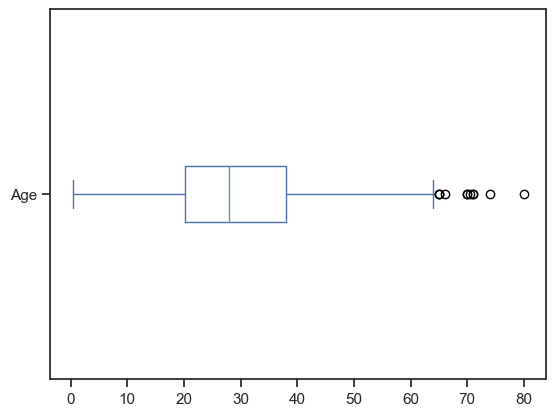

In [82]:
df["Age"].plot(kind="box", vert=False)

# Remplacement des valeurs manquantes de la colonne Cabin par "Unknown"

In [123]:
df["Cabin"] = df["Cabin"].apply(lambda x : x if pd.notna(x) else "Unkown")

In [124]:
df["Cabin"].unique()

array(['Unkown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 

In [125]:
df['cabin_boolean'] = df["Cabin"].apply(lambda x: False if x == "Unkown" else True)

In [126]:
df["cabin_boolean"]

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: cabin_boolean, Length: 891, dtype: bool

In [128]:
df_plot = df['cabin_boolean'].value_counts().to_frame()

In [137]:
total= len(df)

In [138]:
total

891

In [147]:
df_plot

,count
cabin_boolean,
False,687
True,204


In [153]:
df_plot.iloc[0,0]

np.int64(687)

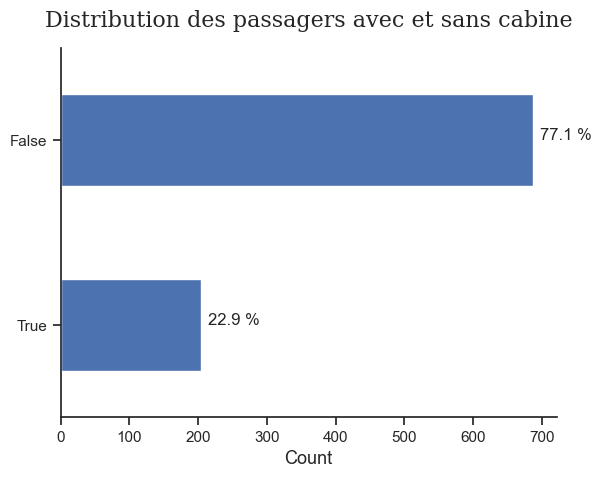

In [ ]:
df_plot.plot(kind="barh")
plt.legend().remove()
plt.ylabel("")
ax=plt.gca()
ax.invert_yaxis()
plt.xlabel("Count", fontsize=13, fontfamily="Sans-Serif")
plt.title("Distribution des passagers avec et sans cabine",fontfamily="serif", fontsize=16, pad=15)

for i, value in enumerate(df_plot.index.tolist()):
    plt.text(df_plot.iloc[i,0] + 10, i,f"{round((df_plot.iloc[i,0]/total) * 100, 2)} %")
sns.despine()


Text(0, 0.5, '')

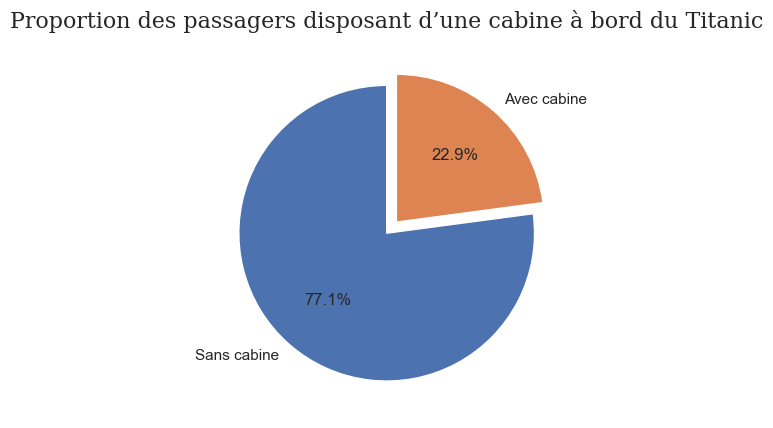

In [175]:
df_plot.plot(kind="pie", autopct="%1.1f%%",startangle=90, y="count", labels=["Sans cabine", "Avec cabine"], explode=(0,0.1))
plt.legend().set_visible(False)
plt.title("Proportion des passagers disposant d’une cabine à bord du Titanic",fontfamily="serif", fontsize=16, pad=15)
plt.ylabel('')

# Analyse du prix du billet

In [88]:
df["Fare"].mean()

np.float64(32.204207968574636)

In [89]:
df["Fare"].median()

14.4542

<Axes: >

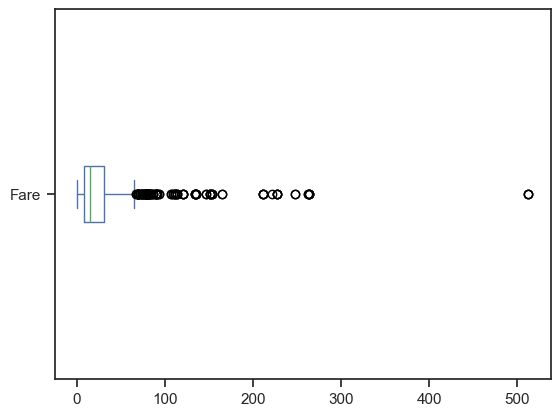

In [91]:
df["Fare"].plot(kind="box", vert=False)

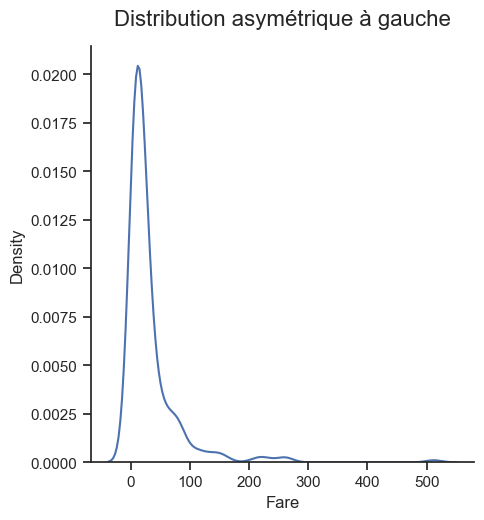

In [108]:
data_plot = df["Fare"].to_frame()
sns.displot(data = data_plot, x="Fare", kind="kde")
plt.title("Distribution asymétrique à gauche", fontsize=16, pad=15)
sns.set_theme(style="ticks")

# Analyse des membres de la famille des passagers

#### but : l’impact de la structure familiale sur la survie

In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

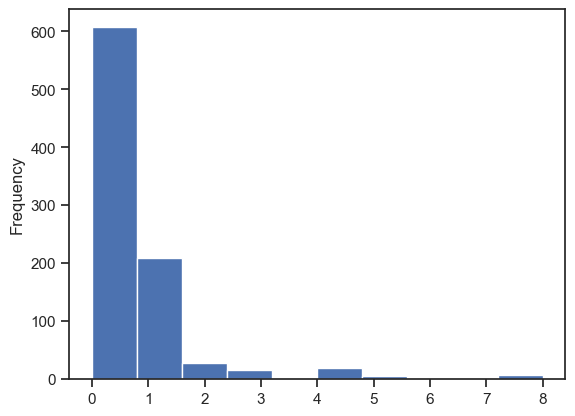

In [ ]:
# SibSp: Nombre de frères, sœurs et/ou conjoint(e) du passager à bord
df["SibSp"].plot(kind="hist")
plt.show()

<Axes: ylabel='Frequency'>

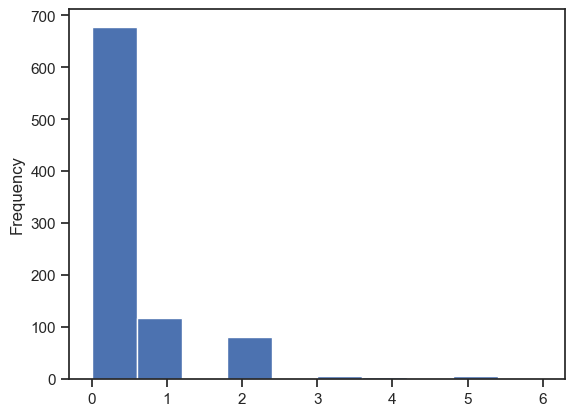

In [ ]:
#  Parch : Nombre de parents et/ou d’enfants du passager à bord
df["Parch"].plot(kind="hist")

In [105]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

<Axes: ylabel='Frequency'>

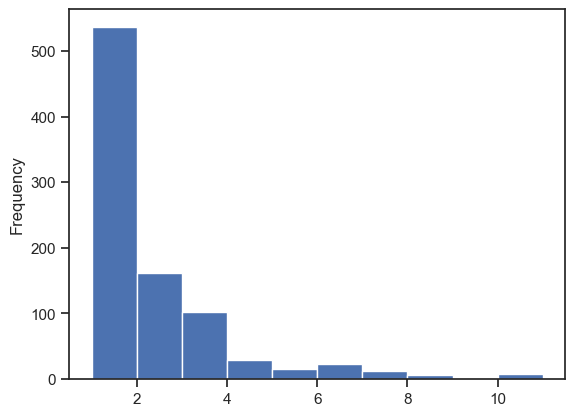

In [107]:
df["FamilySize"].plot(kind="hist")